In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from tensorflow.python.keras import layers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,Input
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

In [5]:
TRAIN_DIR='images/train'
TEST_DIR='images/validation'

In [6]:
#Creating data frame to store images
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [7]:
#Allocating data frame to training set
train=pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
#Allocating data frame to testing set

test=pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img= np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/17246 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
#Scaling

x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
#Display labels

le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
#Allocating labels to training and testing set

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [16]:
model = Sequential()
# convolutional layers
model.add(Input(shape=(48, 48, 1)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [33]:
model.fit(x= x_train,y = y_train, batch_size = 250, epochs = 25, validation_data = (x_test,y_test)) 

Epoch 1/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 370s 5s/step - accuracy: 0.2380 - loss: 1.8240 - val_accuracy: 0.2644 - val_loss: 1.7911
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 360s 5s/step - accuracy: 0.2563 - loss: 1.7838 - val_accuracy: 0.3060 - val_loss: 1.6994
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 358s 5s/step - accuracy: 0.2907 - loss: 1.7252 - val_accuracy: 0.3565 - val_loss: 1.6531
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 367s 5s/step - accuracy: 0.3369 - loss: 1.6603 - val_accuracy: 0.4021 - val_loss: 1.5273
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.3687 - loss: 1.5976 - val_accuracy: 0.4516 - val_loss: 1.4498
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 361s 5s/step - accuracy: 0.4094 - loss: 1.5150 - val_accuracy: 0.4725 - val_loss: 1.4066
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 342s 5s/step - accuracy: 0.4283 - loss: 1.4608 - val_accuracy: 0.4924 - val_loss: 1.3306
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 338s 5s/step - accuracy: 0.4471 - loss: 1.4234 - val_accuracy: 0.4997 - v

In [34]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [35]:
from keras.models import model_from_json

In [ ]:
# json_file = open("facialemotionmodel.json", "r")
# model_json = json_file.read()
# json_file.close()
# model.save('facialemotionmodel.keras')
# model.load_weights("facialemotionmodel.h5")

In [36]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [37]:
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [44]:
image = 'images/validation/disgust/573.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  disgust


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
model prediction is  sad


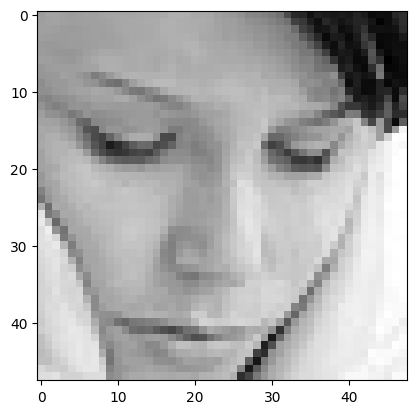

In [40]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')